Missing Values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Number of duplicate rows: 125
Outliers detected:
 Administrative              404
Administrative_Duration    1149
Informational              2631
Informational_Duration     2405
ProductRelated             1007
ProductRelated_Duration     951
BounceRates                1428
ExitRates                  1325
PageValues                 2730
SpecialDay                 1249
OperatingSystems            107
Browser                    4322
Region        

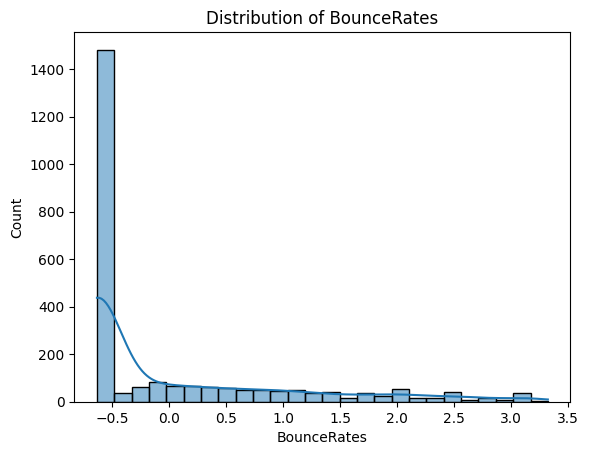

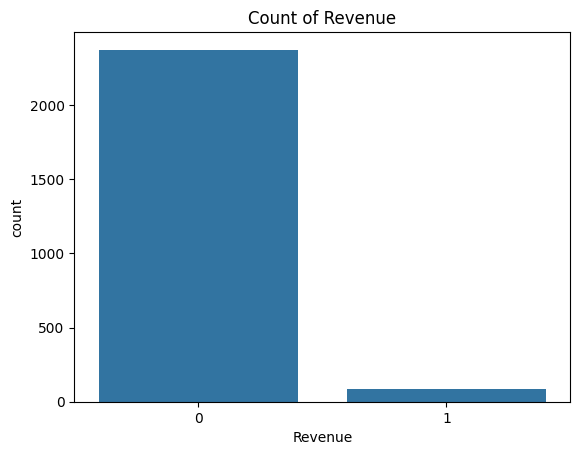

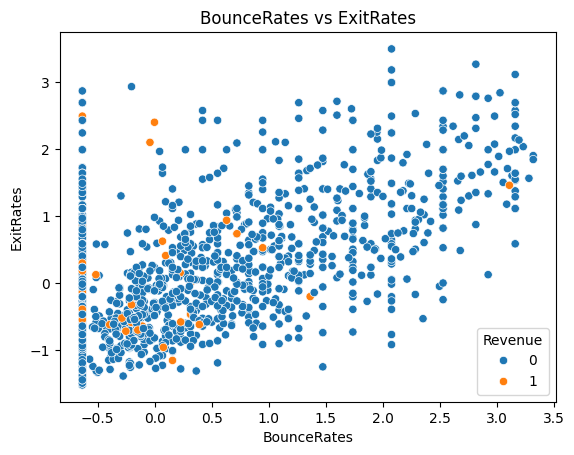

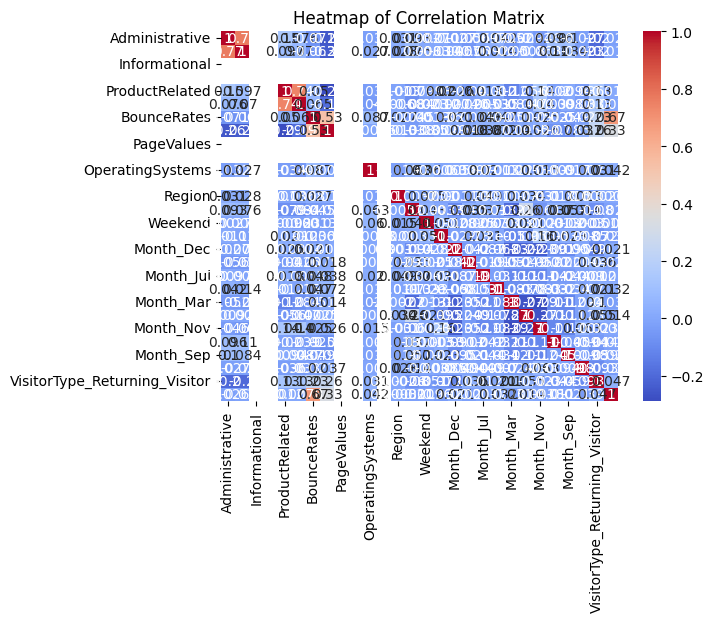

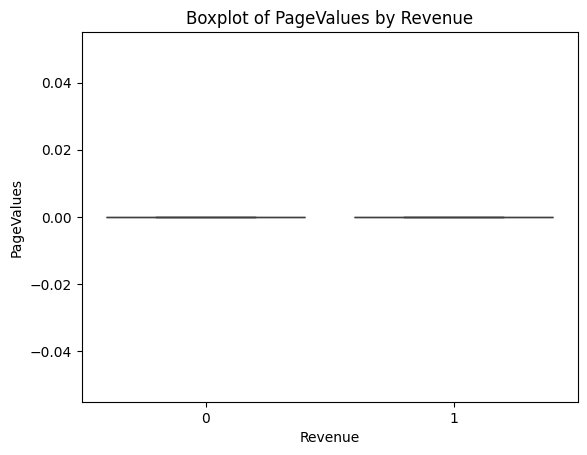

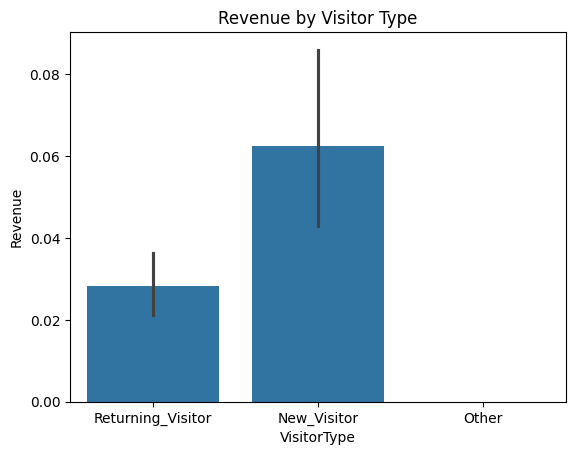

Strong Correlations:
                                Administrative  Administrative_Duration  \
Administrative                        1.00000                  0.76806   
Administrative_Duration               0.76806                  1.00000   
Informational                             NaN                      NaN   
Informational_Duration                    NaN                      NaN   
ProductRelated                            NaN                      NaN   
ProductRelated_Duration                   NaN                      NaN   
BounceRates                               NaN                      NaN   
ExitRates                                 NaN                      NaN   
PageValues                                NaN                      NaN   
SpecialDay                                NaN                      NaN   
OperatingSystems                          NaN                      NaN   
Browser                                   NaN                      NaN   
Region          

C:\Users\Georg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Georg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Georg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# 1. Data Cleaning

# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Handle missing values (categorical columns)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Detect and remove duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df_cleaned = df.drop_duplicates()

# Identify outliers using the IQR method
Q1 = df_cleaned[numeric_cols].quantile(0.25)
Q3 = df_cleaned[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected:\n", outliers)

# Optionally, remove outliers
df_cleaned = df_cleaned[~((df_cleaned[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_cleaned[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# 2. Data Transformation

# Perform normalization/standardization where applicable
scaler = StandardScaler()

# Standardizing numerical columns
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

print("Standardized Data:\n", df_cleaned.head())

# 3. Handling Categorical Data

# Identify categorical variables
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols)

# Convert categorical data into numerical formats using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("Data after One-Hot Encoding:\n", df_encoded.head())

# Alternatively, using Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
df_cleaned['Revenue'] = label_encoder.fit_transform(df_cleaned['Revenue'])
print(df_cleaned['Revenue'].head())

# 4. Feature Engineering

# Example: Create new features
df_encoded['New_Feature'] = df_encoded['BounceRates'] * df_encoded['ExitRates']
print("Data with New Feature:\n", df_encoded.head())

# Analyze the importance of new features
correlation_matrix = df_encoded.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 5. Exploratory Data Analysis (EDA)

# Univariate Analysis
sns.histplot(df_encoded['BounceRates'], kde=True)
plt.title('Distribution of BounceRates')
plt.show()

sns.countplot(x='Revenue', data=df_cleaned)
plt.title('Count of Revenue')
plt.show()

# Bivariate Analysis
sns.scatterplot(x='BounceRates', y='ExitRates', hue='Revenue', data=df_cleaned)
plt.title('BounceRates vs ExitRates')
plt.show()

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# 6. Outlier Detection and Handling

# Already handled outliers using IQR method in Data Cleaning section.

# 7. Data Visualization

# Create meaningful visualizations to summarize key findings from EDA
sns.boxplot(x='Revenue', y='PageValues', data=df_cleaned)
plt.title('Boxplot of PageValues by Revenue')
plt.show()

sns.barplot(x='VisitorType', y='Revenue', data=df_cleaned)
plt.title('Revenue by Visitor Type')
plt.show()

# 8. Correlation Analysis

# Calculate correlation matrix for numerical features
correlation_matrix = df_encoded.corr()

# Identify strong correlations
strong_correlations = correlation_matrix[correlation_matrix.abs() > 0.5]
print("Strong Correlations:\n", strong_correlations)

# 9. Building a Machine Learning Model

# Step 1: Split the Data
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Select and Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 3: Make Predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Step 5: Feature Importance (optional)
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)

In [10]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetic.csv')
rows,columns = df.shape
number_features =len(df.columns)
print (f"\nNumber of rows and columns: {rows,columns}")
print(f"\nTotal number of features :{number_features}")



Number of rows and columns: (101766, 50)

Total number of features :50
